In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 15 August 2023
# Description:
#     this script get the heat transport across 1500m calculate for individual experiments:
# WAOM10: WAOM10extend_shflim_S_0.25Q_Cross-1500m-Transport.ipynb
# WAOM4: WAOM4extend_shflim_S_0.25Q_Cross-1500m-Transport.py
# WAOM4-NOTIDE: WAOM4extend_shflim_S_0.25Q_notides_Cross-1500m-Transport.py
# WAOM2:
# and plot vertically-integrated analyses:
# 1) annual average



In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num

import gsw

import pyresample

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 251.18 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37443,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.18 GiB
Comm: tcp://127.0.0.1:40865,Total threads: 4
Dashboard: /proxy/35811/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:35363,


## Load above contour variables from processed netCDF

In [4]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [5]:
# determine constants:
rho0 = 1025 # kg. m-3
Cp = 3989.245 # J.kg-1.degC-1
Tf = -1.95 # degC


In [6]:
# load ice draft to create masks
expt = 'WAOM10'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_daily')
# Tf_heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily')
heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily')
vol_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily')
salt_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

0.3.0


In [7]:
# define mean currents:
vol_transp_clim_10km = vol_transport_10km.mean('ocean_time')
# overwrite Tf_heat_transport_10km using climatological volume transport*Tf
Tf_heat_transport_10km = vol_transp_clim_10km*Tf*Cp*rho0

In [8]:
%%time

expt = 'WAOM4'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
# Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4km = vol_transport_4km*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + 'Zrho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m') 
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 110 ms, sys: 59 ms, total: 169 ms
Wall time: 713 ms


In [9]:
# define mean currents:
vol_transp_clim_4km = vol_transport_4km.mean('ocean_time')
# overwrite Tf_heat_transport_4kmNT using climatological volume transport*Tf
Tf_heat_transport_4km = vol_transp_clim_4km*Tf*Cp*rho0

In [10]:
%%time

expt = 'WAOM4'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
# Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4km = vol_transport_4km*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + 'Zrho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m') 
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 37.6 ms, sys: 8.24 ms, total: 45.9 ms
Wall time: 47.8 ms


In [11]:
%%time
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
Tf_heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4kmNT = vol_transport_4kmNT*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_daily')
# dist_along_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_daily')
# lon_along_4kmNT = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_daily')
# lat_along_4kmNT = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_daily')
# distance_indicesNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

CPU times: user 93.5 ms, sys: 36.4 ms, total: 130 ms
Wall time: 567 ms


In [12]:
# define mean currents:
vol_transp_clim_4kmNT = vol_transport_4kmNT.mean('ocean_time')
# overwrite Tf_heat_transport_4kmNT using climatological volume transport*Tf
Tf_heat_transport_4kmNT = vol_transp_clim_4kmNT*Tf*Cp*rho0

In [13]:
# define along_contour axis with same length for both resolutions:
[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))


# Obtain area of the section along the isobath contour:
# first get the distance/dy:
dy_10km_tmp = dist_along_axis_10km[:,1:-1] - dist_along_axis_10km[:,0:-2]
# repeate first and last dy to match size:
dy_10km = np.empty(dist_along_axis_10km.shape)
dy_10km[:,1:-1] =  dy_10km_tmp
dy_10km[:,0] =  dy_10km_tmp[:,0]
dy_10km[:,-1] =  dy_10km_tmp[:,-1]

# 4km: first get the distance/dy:
dy_4km_tmp = dist_along_axis_4km[:,1:-1] - dist_along_axis_4km[:,0:-2]
dy_4km = np.empty(dist_along_axis_4km.shape)
dy_4km[:,1:-1] =  dy_4km_tmp
dy_4km[:,0] =  dy_4km_tmp[:,0]
dy_4km[:,-1] =  dy_4km_tmp[:,-1]

# calculate area 
area_10km = dy_10km*1e6 # convert back to meters:
area_4km = dy_4km*1e6 # convert back to meters:


In [14]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'


# Decomposition mean and eddy heat transport:


In [15]:
%%time
# WAOM10

# 1a) re-sample to monthly to calculate *seasonal cycle*:
months = p.date_range(start='2007-01-01', end='2007-12-31')
# Create an xarray DataArray with the daily values and datetime index
dt = xr.DataArray(temp_10km, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
dv = xr.DataArray(vol_transport_10km, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
temp_10km_monthly = dt.resample(ocean_time='1M').mean()
vol_transp_10km_monthly = dv.resample(ocean_time='1M').mean()

# 1b) calculate climatological seasonal mean
volxT_10km_season = vol_transp_10km_monthly*(temp_10km_monthly-Tf) # vT x Cp Rho0

# 2) Total heat transport: average(vol_transp*T)
volxT_10km = vol_transport_10km*(temp_10km-Tf) # vT x Cp Rho0
Total_transp_10km = volxT_10km.mean('ocean_time')

# 3) Mean heat transport: avg(vol_transp)*avg(T) ->> there're difference in doing annual mean from daily x annual mean from; I think I just don't need this from monthly
vol_transp_10km_annual = vol_transp_10km_monthly.mean('ocean_time')
temp_10km_annual = temp_10km_monthly.mean('ocean_time') - Tf
Mean_transp_10km = vol_transp_10km_annual*temp_10km_annual

# 4) Eddy heat transport: total - seasonal mean
months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])
Eddy_transp_10km = np.empty((0,31,2588))
for mm in np.arange(0,12):
    aa=np.where(mm == months_flr)

    Eddy_transp_10km_tmp = (temp_10km[aa[0],:,:]*vol_transport_10km[aa[0],:,:]) - volxT_10km_season[mm,:,:]
    Eddy_transp_10km = np.concatenate((Eddy_transp_10km_tmp, Eddy_transp_10km), axis=0)


CPU times: user 1.74 s, sys: 1.26 s, total: 3 s
Wall time: 2.94 s


In [16]:
%%time
# WAOM4

# 1a) re-sample to monthly to calculate *seasonal cycle*:
months = p.date_range(start='2007-01-01', end='2007-12-31')
# Create an xarray DataArray with the daily values and datetime index
dt = xr.DataArray(temp_4km, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
dv = xr.DataArray(vol_transport_4km, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
temp_4km_monthly = dt.resample(ocean_time='1M').mean()
vol_transp_4km_monthly = dv.resample(ocean_time='1M').mean()

# 1b) calculate climatological seasonal mean
volxT_4km_season = vol_transp_4km_monthly*(temp_4km_monthly-Tf) # vT x Cp Rho0

# 2) Total heat transport: average(vol_transp*T)
volxT_4km = vol_transport_4km*(temp_4km-Tf) # vT x Cp Rho0
Total_transp_4km = volxT_4km.mean('ocean_time')

# 3) Mean heat transport: avg(vol_transp)*avg(T) ->> there're difference in doing annual mean from daily x annual mean from; I think I just don't need this from monthly
vol_transp_4km_annual = vol_transp_4km_monthly.mean('ocean_time')
temp_4km_annual = temp_4km_monthly.mean('ocean_time') - Tf
Mean_transp_4km = vol_transp_4km_annual*temp_4km_annual

# 4) Eddy heat transport: total - seasonal mean
months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])
Eddy_transp_4km = np.empty((0,31,6919))
for mm in np.arange(0,12):
    aa=np.where(mm == months_flr)

    Eddy_transp_4km_tmp = (temp_4km[aa[0],:,:]*vol_transport_4km[aa[0],:,:]) - volxT_4km_season[mm,:,:]
    Eddy_transp_4km = np.concatenate((Eddy_transp_4km_tmp, Eddy_transp_4km), axis=0)


CPU times: user 5.24 s, sys: 4.06 s, total: 9.3 s
Wall time: 8.83 s


In [17]:
%%time
# WAOM4-NOTIDES

# 1a) re-sample to monthly to calculate *seasonal cycle*:
months = p.date_range(start='2007-01-01', end='2007-12-31')
# Create an xarray DataArray with the daily values and datetime index
dt = xr.DataArray(temp_4kmNT, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
dv = xr.DataArray(vol_transport_4kmNT, dims=('ocean_time', 's_rho', 'contour_index_array'), coords={'ocean_time': months})
temp_4kmNT_monthly = dt.resample(ocean_time='1M').mean()
vol_transp_4kmNT_monthly = dv.resample(ocean_time='1M').mean()

# 1b) calculate climatological seasonal mean
volxT_4kmNT_season = vol_transp_4kmNT_monthly*(temp_4kmNT_monthly-Tf) # vT x Cp Rho0

# 2) Total heat transport: average(vol_transp*T)
volxT_4kmNT = vol_transport_4kmNT*(temp_4kmNT-Tf) # vT x Cp Rho0
Total_transp_4kmNT = volxT_4kmNT.mean('ocean_time')

# 3) Mean heat transport: avg(vol_transp)*avg(T) ->> there're difference in doing annual mean from daily x annual mean from; I think I just don't need this from monthly
vol_transp_4kmNT_annual = vol_transp_4kmNT_monthly.mean('ocean_time')
temp_4kmNT_annual = temp_4kmNT_monthly.mean('ocean_time') - Tf
Mean_transp_4kmNT = vol_transp_4kmNT_annual*temp_4kmNT_annual

# 4) Eddy heat transport: total - seasonal mean
months=np.arange(0,365)*(1/30.41667)
months_flr = np.floor(months[:])
Eddy_transp_4kmNT = np.empty((0,31,6919))
for mm in np.arange(0,12):
    aa=np.where(mm == months_flr)

    Eddy_transp_4kmNT_tmp = (temp_4kmNT[aa[0],:,:]*vol_transport_4kmNT[aa[0],:,:]) - volxT_4kmNT_season[mm,:,:]
    Eddy_transp_4kmNT = np.concatenate((Eddy_transp_4kmNT_tmp, Eddy_transp_4kmNT), axis=0)


CPU times: user 5.05 s, sys: 3.76 s, total: 8.8 s
Wall time: 8.54 s


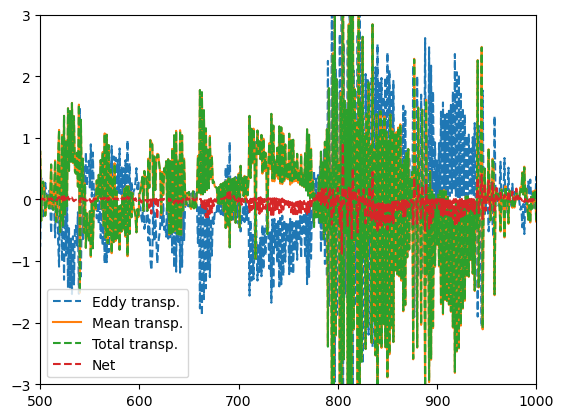

In [19]:
plt.plot(np.sum(np.nanmean(Eddy_transp_4kmNT, axis=0), axis=0)*rho0*Cp*1e-12,'--', label='Eddy transp.')
plt.plot(np.sum(Mean_transp_4kmNT, axis=0)*rho0*Cp*1e-12, label='Mean transp.')
plt.plot(np.sum(Total_transp_4kmNT, axis=0)*rho0*Cp*1e-12,'--', label='Total transp.')
plt.plot((np.sum(np.nanmean(Eddy_transp_4kmNT, axis=0), axis=0)+np.sum(Total_transp_4kmNT, axis=0))*rho0*Cp*1e-12,'--', label='Net')

plt.xlim([500,1000])
plt.ylim([-3,3])

plt.legend()


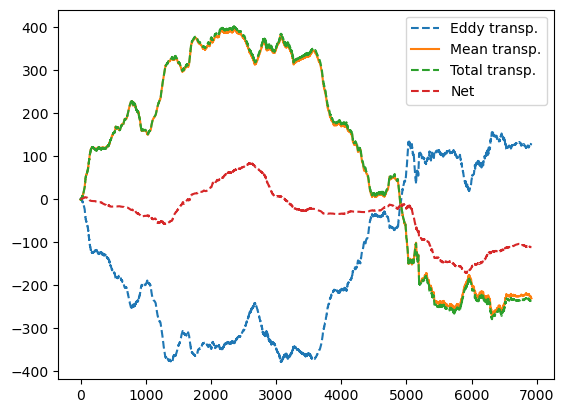

In [20]:
plt.plot(np.cumsum(np.sum(np.nanmean(Eddy_transp_4kmNT, axis=0), axis=0),axis=-1)*rho0*Cp*1e-12,'--', label='Eddy transp.')
plt.plot(np.cumsum(np.sum(Mean_transp_4kmNT, axis=0),axis=-1)*rho0*Cp*1e-12, label='Mean transp.')
plt.plot(np.cumsum(np.sum(Total_transp_4kmNT, axis=0),axis=-1)*rho0*Cp*1e-12,'--', label='Total transp.')
plt.plot(np.cumsum((np.sum(np.nanmean(Eddy_transp_4kmNT, axis=0), axis=0)+np.sum(Total_transp_4kmNT, axis=0)),axis=-1)*rho0*Cp*1e-12,'--', label='Net')

# plt.xlim([500,1000])
# plt.ylim([-3,3])

plt.legend()


## Plots 

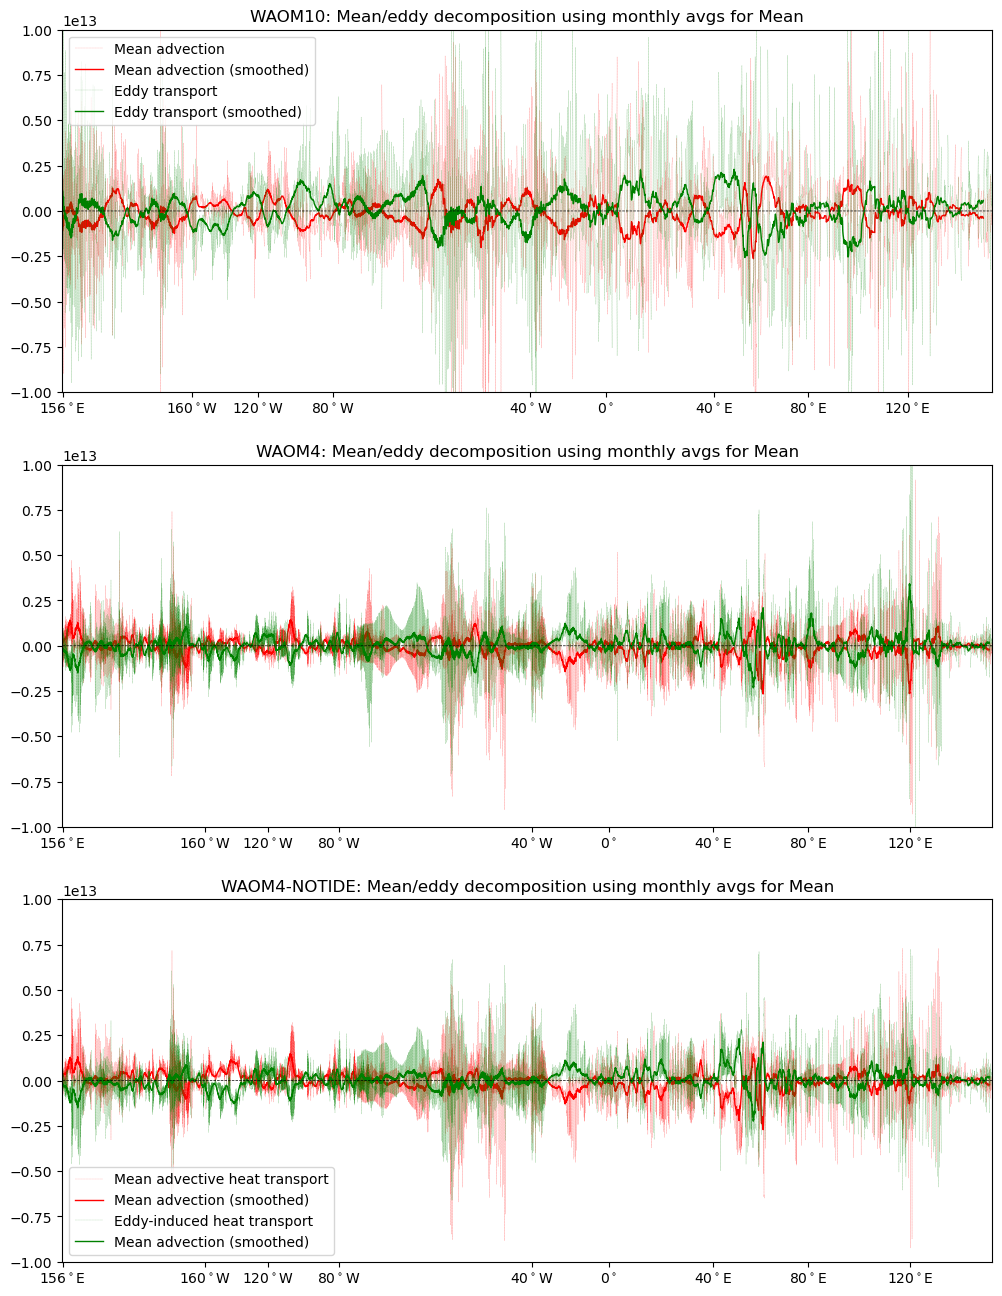

In [20]:
# - plot vert-summed:
fig, ax = plt.subplots(nrows=3, figsize = (12, 16))

# WAOM10
ax[0].plot(dist_along_10km[:],np.sum(Total_transp_10km[:,:], axis=0)*Cp*rho0,'--r',label='Mean advection', linewidth=0.1)
x=np.sum(Total_transp_10km[:,:], axis=0)*Cp*rho0
N=25 # groups of points along the contour line - use dist to translate to distance (average throughout)
ax[0].plot(dist_along_10km[np.arange(0,len(Total_transp_10km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

eddy_fac = 1
ax[0].plot(dist_along_10km[:],np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0,'--g',label='Eddy transport', linewidth=0.1)
x=np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[0].plot(dist_along_10km[np.arange(0,len(Total_transp_10km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Eddy transport (smoothed)',linewidth=1) 

ax[0].plot(dist_along_10km[:],np.zeros(Total_transp_10km[0,:].shape),'--k', linewidth=0.5)
ax[0].set_ylim(-1e13,1e13)
ax[0].set_title('WAOM10: Mean/eddy decomposition using monthly avgs for Mean')
ax[0].legend()
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])

# WAOM4
ax[1].plot(dist_along_4km[:],np.sum(Total_transp_4km[:,:], axis=0)*Cp*rho0,'--r',label='Mean advective heat transport', linewidth=0.1)
x=np.sum(Total_transp_4km[:,:], axis=0)*Cp*rho0
ax[1].plot(dist_along_4km[np.arange(0,len(Total_transp_4km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

ax[1].plot(dist_along_4km[:],np.sum(np.nanmean(Eddy_transp_4km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0,'--g',label='Eddy-induced heat transport', linewidth=0.1)
x=np.sum(np.nanmean(Eddy_transp_4km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[1].plot(dist_along_4km[np.arange(0,len(Total_transp_4km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Mean advection (smoothed)',linewidth=1) 

ax[1].plot(dist_along_4km[:],np.zeros(Total_transp_4km[0,:].shape),'--k', linewidth=0.5)
ax[1].set_ylim(-1e13,1e13)
ax[1].set_title('WAOM4: Mean/eddy decomposition using monthly avgs for Mean')
# ax[1].legend()
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])

# # WAOM4-NT
ax[2].plot(dist_along_4km[:],np.sum(Total_transp_4kmNT[:,:], axis=0)*Cp*rho0,'--r',label='Mean advective heat transport', linewidth=0.1)
x=np.sum(Total_transp_4kmNT[:,:], axis=0)*Cp*rho0
ax[2].plot(dist_along_4km[np.arange(0,len(Total_transp_4kmNT[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

ax[2].plot(dist_along_4km[:],np.sum(np.nanmean(Eddy_transp_4kmNT[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0,'--g',label='Eddy-induced heat transport', linewidth=0.1)
x=np.sum(np.nanmean(Eddy_transp_4kmNT[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[2].plot(dist_along_4km[np.arange(0,len(Total_transp_4kmNT[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Mean advection (smoothed)',linewidth=1) 

ax[2].plot(dist_along_4km[:],np.zeros(Total_transp_4kmNT[0,:].shape),'--k', linewidth=0.5)
ax[2].set_ylim(-1e13,1e13)
ax[2].set_title('WAOM4-NOTIDE: Mean/eddy decomposition using monthly avgs for Mean')
ax[2].legend()
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
plt.savefig(fig_path + 'Mean_Eddy_HTabs_cross1500m_annual_avg.png', dpi=300, bbox_inches='tight')
plt.show()

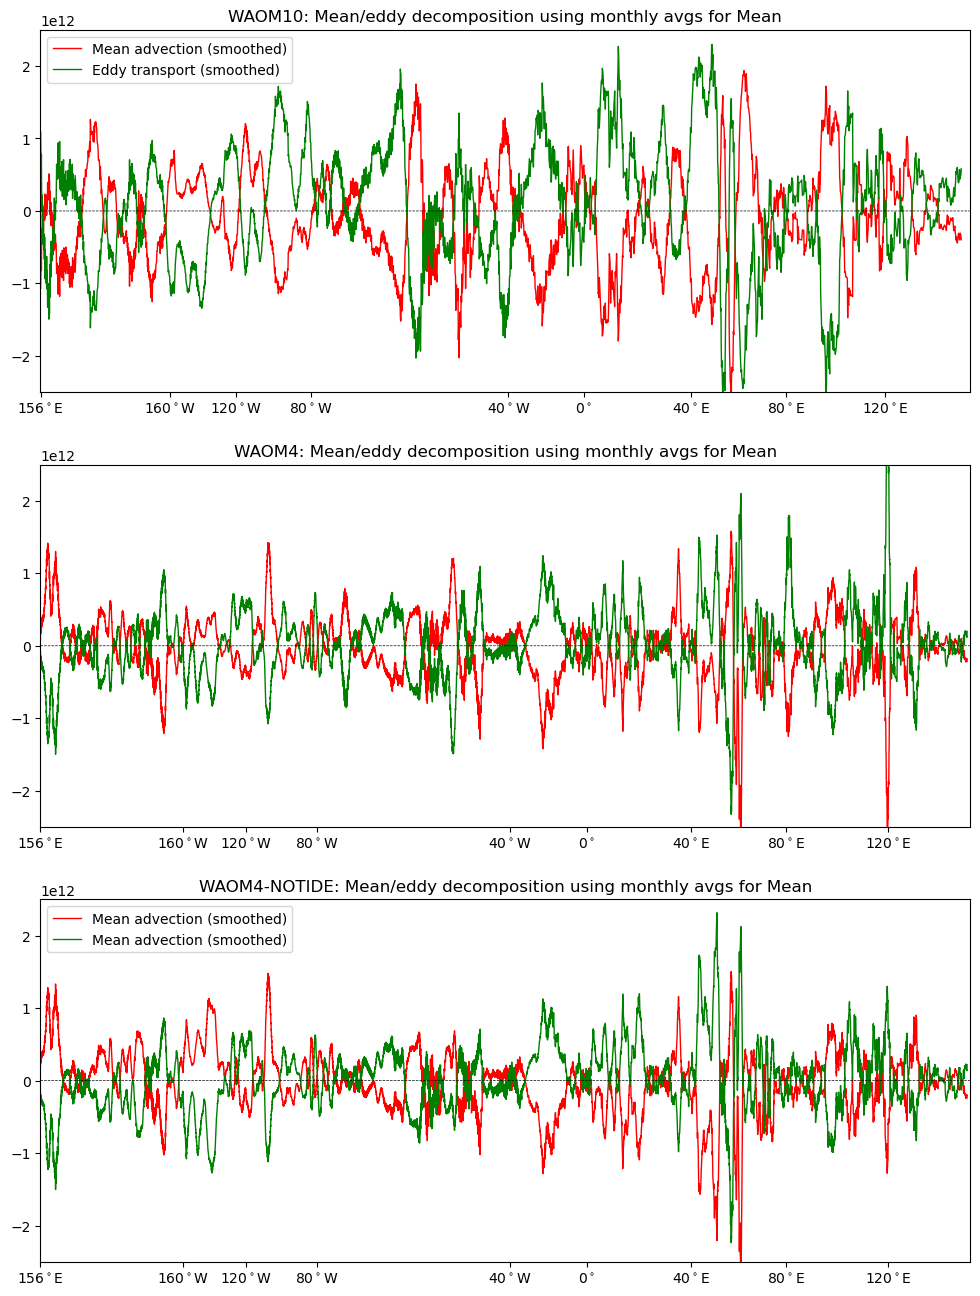

In [21]:
# - plot vert-summed:
fig, ax = plt.subplots(nrows=3, figsize = (12, 16))

# WAOM10
x=np.sum(Mean_transp_10km[:,:], axis=0)*Cp*rho0
N=25 # groups of points along the contour line - use dist to translate to distance (average throughout)
ax[0].plot(dist_along_10km[np.arange(0,len(Mean_transp_10km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

eddy_fac = 1
x=np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[0].plot(dist_along_10km[np.arange(0,len(Mean_transp_10km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Eddy transport (smoothed)',linewidth=1) 

ax[0].plot(dist_along_10km[:],np.zeros(Mean_transp_10km[0,:].shape),'--k', linewidth=0.5)
ax[0].set_ylim(-.25e13,.25e13)
ax[0].set_title('WAOM10: Mean/eddy decomposition using monthly avgs for Mean')
ax[0].legend()
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])

# WAOM4
x=np.sum(Mean_transp_4km[:,:], axis=0)*Cp*rho0
ax[1].plot(dist_along_4km[np.arange(0,len(Mean_transp_4km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

x=np.sum(np.nanmean(Eddy_transp_4km[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[1].plot(dist_along_4km[np.arange(0,len(Mean_transp_4km[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Mean advection (smoothed)',linewidth=1) 

ax[1].plot(dist_along_4km[:],np.zeros(Mean_transp_4km[0,:].shape),'--k', linewidth=0.5)
ax[1].set_ylim(-.25e13,.25e13)
ax[1].set_title('WAOM4: Mean/eddy decomposition using monthly avgs for Mean')
# ax[1].legend()
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])

# WAOM4-NT
x=np.sum(Mean_transp_4kmNT[:,:], axis=0)*Cp*rho0
ax[2].plot(dist_along_4km[np.arange(0,len(Mean_transp_4kmNT[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-r', label='Mean advection (smoothed)',linewidth=1) 

x=np.sum(np.nanmean(Eddy_transp_4kmNT[:,:,:], axis=0), axis=0)*eddy_fac*Cp*rho0
ax[2].plot(dist_along_4km[np.arange(0,len(Mean_transp_4kmNT[0,:])-N+1)],np.convolve(x, np.ones(N)/N, mode='valid'), '-g', label='Mean advection (smoothed)',linewidth=1) 

ax[2].plot(dist_along_4km[:],np.zeros(Mean_transp_4kmNT[0,:].shape),'--k', linewidth=0.5)
ax[2].set_ylim(-.25e13,.25e13)
ax[2].set_title('WAOM4-NOTIDE: Mean/eddy decomposition using monthly avgs for Mean')
ax[2].legend()
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
plt.savefig(fig_path + 'Mean_Eddy_HTabs_cross1500m_annual_avg_smoothed.png', dpi=300, bbox_inches='tight')
# plt.show()

In [22]:
mean_cumsum_10km = np.cumsum(np.sum(Mean_transp_10km[:,:], axis=0)*Cp*rho0)
total_cumsum_10km = np.cumsum(np.sum(Total_transp_10km[:,:], axis=0)*Cp*rho0)
eddy_cumsum_10km = np.cumsum(np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*Cp*rho0)
print(mean_cumsum_10km[-1]*1e-12)
print(total_cumsum_10km[-1]*1e-12)
print(eddy_cumsum_10km[-1]*1e-12)

# IT DOES MAKE SENSE, MEAN + EDDY WOULD BE AROUND -230 TW ->  -270 TW AT WAOM10

mean_cumsum_4km = np.cumsum(np.sum(Mean_transp_4km[:,:], axis=0)*Cp*rho0)
total_cumsum_4km = np.cumsum(np.sum(Total_transp_4km[:,:], axis=0)*Cp*rho0)
eddy_cumsum_4km = np.cumsum(np.sum(np.nanmean(Eddy_transp_4km[:,:,:], axis=0), axis=0)*Cp*rho0)

mean_cumsum_4kmNT = np.cumsum(np.sum(Mean_transp_4kmNT[:,:], axis=0)*Cp*rho0)
total_cumsum_4kmNT = np.cumsum(np.sum(Total_transp_4kmNT[:,:], axis=0)*Cp*rho0)
eddy_cumsum_4kmNT = np.cumsum(np.sum(np.nanmean(Eddy_transp_4kmNT[:,:,:], axis=0), axis=0)*Cp*rho0)

<xarray.DataArray ()>
array(-298.63922243)
<xarray.Variable ()>
array(-305.65483493)
206.58722448780787


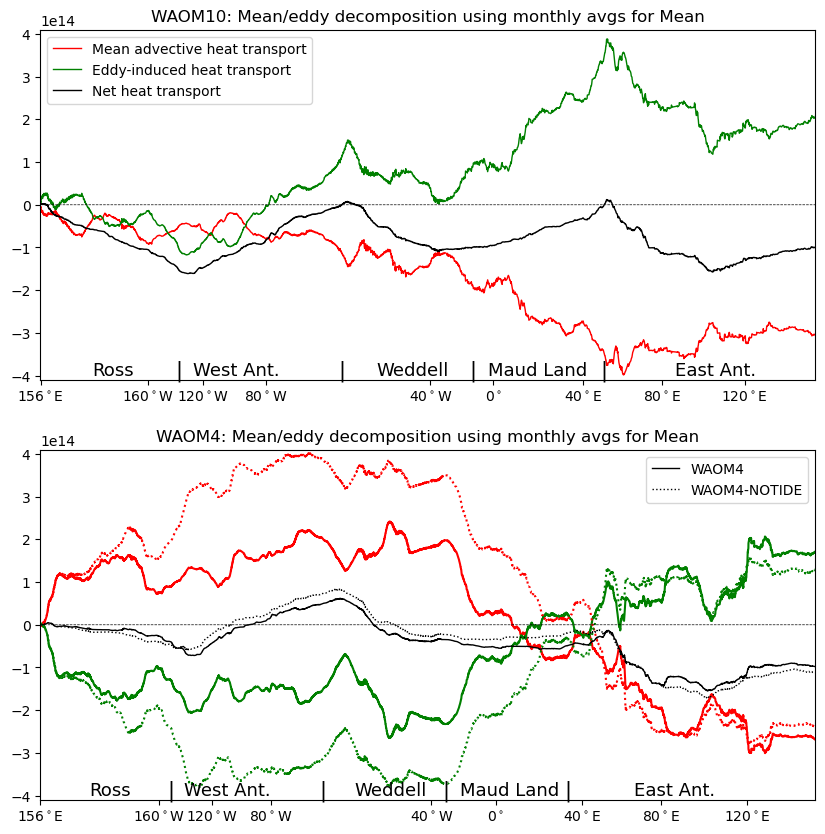

In [23]:
# - plot vert-summed:
fig, ax = plt.subplots(nrows=2, figsize = (10, 10))
# waom10
ax[0].plot(dist_along_10km[:],total_cumsum_10km,'-r',label='Mean advective heat transport', linewidth=1)
ax[0].plot(dist_along_10km[:],eddy_cumsum_10km,'-g',label='Eddy-induced heat transport', linewidth=1)
ax[0].plot(dist_along_10km[:],total_cumsum_10km+eddy_cumsum_10km,'-k',label='Net heat transport', linewidth=1)
ax[0].plot(dist_along_10km[:],np.zeros(Mean_transp_10km[0,:].shape),'--k', linewidth=0.5)
ax[0].set_title('WAOM10: Mean/eddy decomposition using monthly avgs for Mean')
ax[0].legend()
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])

# waom4
ax[1].plot(dist_along_4km[:],total_cumsum_4km,'-r')#,label='Mean advective heat transport', linewidth=1)
ax[1].plot(dist_along_4km[:],eddy_cumsum_4km,'-g')#,label='Eddy-induced heat transport ', linewidth=1)
ax[1].plot(dist_along_4km[:],total_cumsum_4km+eddy_cumsum_4km,'-k',label='WAOM4', linewidth=1)
# waom4-NT
ax[1].plot(dist_along_4km[:],total_cumsum_4kmNT,':r')#,label='Mean advective heat transport (NOTIDE)', linewidth=1)
ax[1].plot(dist_along_4km[:],eddy_cumsum_4kmNT,':g')#,label='Eddy-induced heat transport (NOTIDE) ', linewidth=1)
ax[1].plot(dist_along_4km[:],total_cumsum_4kmNT+eddy_cumsum_4kmNT,':k',label='WAOM4-NOTIDE', linewidth=1)
ax[1].plot(dist_along_4km[:],np.zeros(Mean_transp_4km[0,:].shape),'--k', linewidth=0.5)
ax[1].set_title('WAOM4: Mean/eddy decomposition using monthly avgs for Mean')
# plt.legend()
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].legend()


for xx in range(0,2):
    ax[xx].set_ylim(-4.1e14,4.1e14)
    ax[xx].text(2.895576e+00-1.5,-4e14,'Ross',fontsize=13, color='k')         # 4) Mask Ross (140W : 160E, lat < -60)
    ax[xx].text(3.634185,-4e14,'|',fontsize=15, color='k')                 
    ax[xx].text(4.1,-4e14,'West Ant.',fontsize=13, color='k')           # 5) Mask West Antarctica (150W : 90W, lat < -65)
    ax[xx].text(8,-4e14,'|',fontsize=15, color='k')                           # 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
    ax[xx].text(9,-4e14,'Weddell',fontsize=13, color='k')
    ax[xx].text(11.5,-4e14,'|',fontsize=15, color='k')
    ax[xx].text(12,-4e14,'Maud Land',fontsize=13, color='k')                  # 2) Mask Maud Land (25W : 60E, lat < -60)
    ax[xx].text(15,-4e14,'|',fontsize=15, color='k')
    ax[xx].text(17,-4e14,'East Ant.',fontsize=13, color='k')            # 3) Mask East Antarctica (60E : 160E, lat < -60)

plt.savefig(fig_path + 'Mean_Eddy_HTcumsum_cross1500m_annual_vint.png', dpi=300, bbox_inches='tight')
plt.show()

(-200000000000000.0, 50000000000000.0)

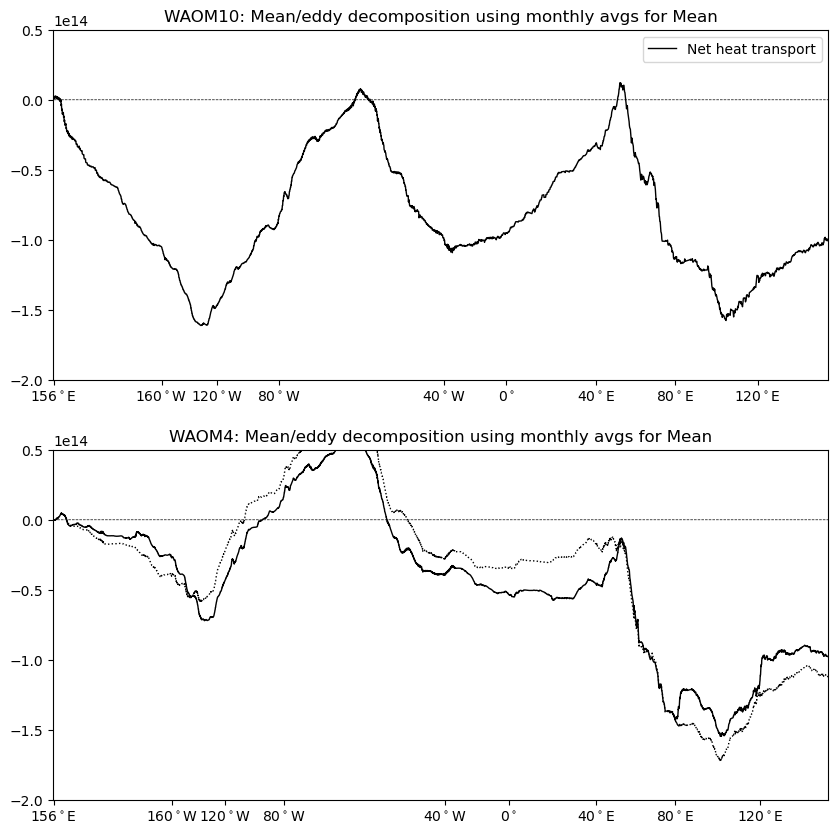

In [24]:
fig, ax = plt.subplots(nrows=2, figsize = (10, 10))
# waom10
ax[0].plot(dist_along_10km[:],total_cumsum_10km+eddy_cumsum_10km,'-k',label='Net heat transport', linewidth=1)
ax[0].plot(dist_along_10km[:],np.zeros(Mean_transp_10km[0,:].shape),'--k', linewidth=0.5)
ax[0].set_title('WAOM10: Mean/eddy decomposition using monthly avgs for Mean')
ax[0].legend()
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].set_ylim(-2e14, .5e14)

# waom4
ax[1].plot(dist_along_4km[:],total_cumsum_4km+eddy_cumsum_4km,'-k',label='Net heat transport', linewidth=1)
# waom4-NT
ax[1].plot(dist_along_4km[:],total_cumsum_4kmNT+eddy_cumsum_4kmNT,':k',label='Net heat transport (NOTIDE)', linewidth=1)
ax[1].plot(dist_along_4km[:],np.zeros(Mean_transp_4km[0,:].shape),'--k', linewidth=0.5)
ax[1].set_title('WAOM4: Mean/eddy decomposition using monthly avgs for Mean')
# plt.legend()
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].set_ylim(-2e14, .5e14)


In [25]:
## PLOT some vertically-discretised HT:
mean_cumsum_10km = np.cumsum(np.sum(Mean_transp_10km[:,:], axis=0)*Cp*rho0)
total_cumsum_10km = np.cumsum(np.sum(Total_transp_10km[:,:], axis=0)*Cp*rho0)
eddy_cumsum_10km = np.cumsum(np.sum(np.nanmean(Eddy_transp_10km[:,:,:], axis=0), axis=0)*Cp*rho0)
print(mean_cumsum_10km[-1]*1e-12)
print(total_cumsum_10km[-1]*1e-12)
print(eddy_cumsum_10km[-1]*1e-12)

# IT DOES MAKE SENSE, MEAN + EDDY WOULD BE AROUND -230 TW ->  -270 TW AT WAOM10

mean_cumsum_4km = np.cumsum(np.sum(Mean_transp_4km[:,:], axis=0)*Cp*rho0)
total_cumsum_4km = np.cumsum(np.sum(Total_transp_4km[:,:], axis=0)*Cp*rho0)
eddy_cumsum_4km = np.cumsum(np.sum(np.nanmean(Eddy_transp_4km[:,:,:], axis=0), axis=0)*Cp*rho0)

mean_cumsum_4kmNT = np.cumsum(np.sum(Mean_transp_4kmNT[:,:], axis=0)*Cp*rho0)
total_cumsum_4kmNT = np.cumsum(np.sum(Total_transp_4kmNT[:,:], axis=0)*Cp*rho0)
eddy_cumsum_4kmNT = np.cumsum(np.sum(np.nanmean(Eddy_transp_4kmNT[:,:,:], axis=0), axis=0)*Cp*rho0)

<xarray.DataArray ()>
array(-298.63922243)
<xarray.Variable ()>
array(-305.65483493)
206.58722448780787


In [1]:
plt.pcolormesh(dist_along_4km[:],(Mean_transp_4km-Mean_transp_4kmNT)*Cp*rho0, cmap=plt.cm.bwr)
plt.colorbar()

NameError: name 'plt' is not defined

In [38]:
Eddy_transp_4km.shape

(365, 31, 6919)

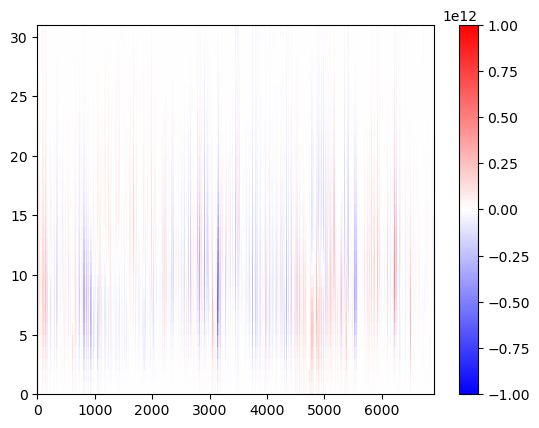

In [35]:
plt.pcolormesh((Total_transp_4km)*Cp*rho0, cmap=plt.cm.bwr)
plt.clim([-1e12,1e12])
plt.colorbar()

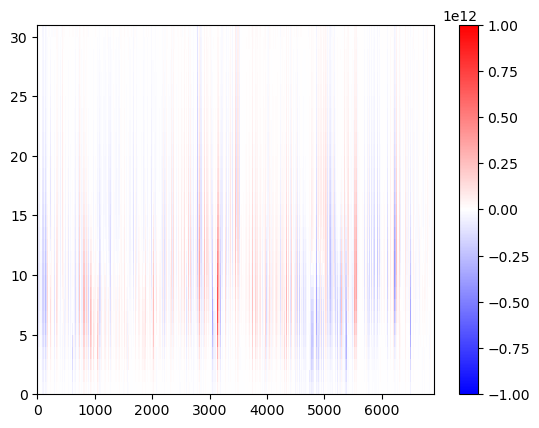

In [40]:
plt.pcolormesh(np.nanmean(Eddy_transp_4km,axis=0)*Cp*rho0, cmap=plt.cm.bwr)
plt.clim([-1e12,1e12])
plt.colorbar()